In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [23]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [16]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [17]:
!ls -alF ./Dacon/
    #저장한 폴더 속성보기 (터미널 명령어 실행 시 앞에 !)

total 449712
drwxr-xr-x   7 jae-wook.lee  staff        224 Sep 16 01:13 ./
drwxr-xr-x  15 jae-wook.lee  staff        480 Sep 22 20:59 ../
-rw-r--r--@  1 jae-wook.lee  staff       6148 Sep 15 02:05 .DS_Store
-rw-r--r--@  1 jae-wook.lee  staff  132588144 Sep 15 02:08 feature.csv
-rw-r--r--@  1 jae-wook.lee  staff     800010 Jul 26 04:35 sample_submission.csv
-rw-r--r--@  1 jae-wook.lee  staff   18936246 Jul 26 04:35 test.csv
-rw-r--r--@  1 jae-wook.lee  staff   76278443 Jul 26 04:35 train.csv


In [18]:
data_dir = Path('./Dacon/')
    #input폴더 경로 설정
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
    #파일 경로를 변수로 설정 후 feature_file을 feature.csv로 저장
seed = 42
    #데이터 샘플 시 랜덤 seed 설정

In [19]:
#######학습 데이터 로드 ########

trn =pd.read_csv(trn_file, index_col= 0)
    #파일을 불러오고 index column 설정. (난 0 을 시작 index 로 하겠다.)
print(trn.shape)
    #데이터 프레임 출력"

(320000, 19)


In [20]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

In [8]:
trn.isnull().sum()

u            0
g            0
r            0
i            0
z            0
redshift     0
dered_u      0
dered_g      0
dered_r      0
dered_i      0
dered_z      0
nObserve     0
nDetect      0
airmass_u    0
airmass_g    0
airmass_r    0
airmass_i    0
airmass_z    0
class        0
dtype: int64

In [9]:
trn.describe()

u            g            r            i            z  \
count  320000.0000  320000.0000  320000.0000  320000.0000  320000.0000   
mean       19.8524      18.3768      17.7358      17.1742      16.8752   
std         1.9455      31.1108       1.4662      52.5615      57.1463   
min       -17.6875  -17555.3656       7.7314  -23955.8178  -23955.8178   
25%        18.7242      17.4749      16.8772      16.5239      16.2889   
50%        19.4194      18.1405      17.5258      17.1497      16.9176   
75%        20.4321      19.0732      18.4281      18.0074      17.7289   
max        58.6233      46.3383      72.0097      50.1641      52.6127   

         redshift      dered_u      dered_g      dered_r      dered_i  \
count  3.2000e+05  320000.0000  320000.0000  320000.0000  320000.0000   
mean   5.8308e-02      19.6289      18.2271      17.6154      17.1523   
std    5.7546e-01       1.9236      17.7866       1.4730      25.0758   
min   -1.6605e+02     -42.8375   -9999.0000     -16.3802   -9999.0000   
25%    3.5580e-05      18.5636      17.3484      16.7871      16.4530   
50%    4.7129e-02      19.2646      18.0224      17.4434      17.0874   
75%    9.4597e-02      20.1976      18.8884      18.2911      17.9070   
max    6.2323e+01      30.7779      30.6132      31.9572      32.0162   

           dered_z     nObserve      nDetect    airmass_u    airmass_g  \
count  320000.0000  320000.0000  320000.0000  320000.0000  320000.0000   
mean       16.8693       6.3327       6.1388       1.1758       1.1765   
std        35.4365       8.8811       8.5516       0.1163       0.1181   
min     -9999.0000       1.0000       1.0000       1.0001       1.0000   
25%        16.2341       1.0000       1.0000       1.0882       1.0884   
50%        16.8694       2.0000       2.0000       1.1793       1.1792   
75%        17.6557       5.0000       5.0000       1.2275       1.2260   
max        30.7813      44.0000      42.0000       2.0508       2.0803   

         airmass_r    airmass_i    airmass_z        class  
count  320000.0000  320000.0000  320000.0000  320000.0000  
mean        1.1751       1.1754       1.1761       1.1163  
std         0.1147       0.1155       0.1172       0.9235  
min         1.0002       1.0001       1.0000       0.0000  
25%         1.0878       1.0880       1.0883       0.0000  
50%         1.1794       1.1794       1.1793       1.0000  
75%         1.2292       1.2286       1.2268       2.0000  
max         2.0221       2.0363       2.0654       2.0000

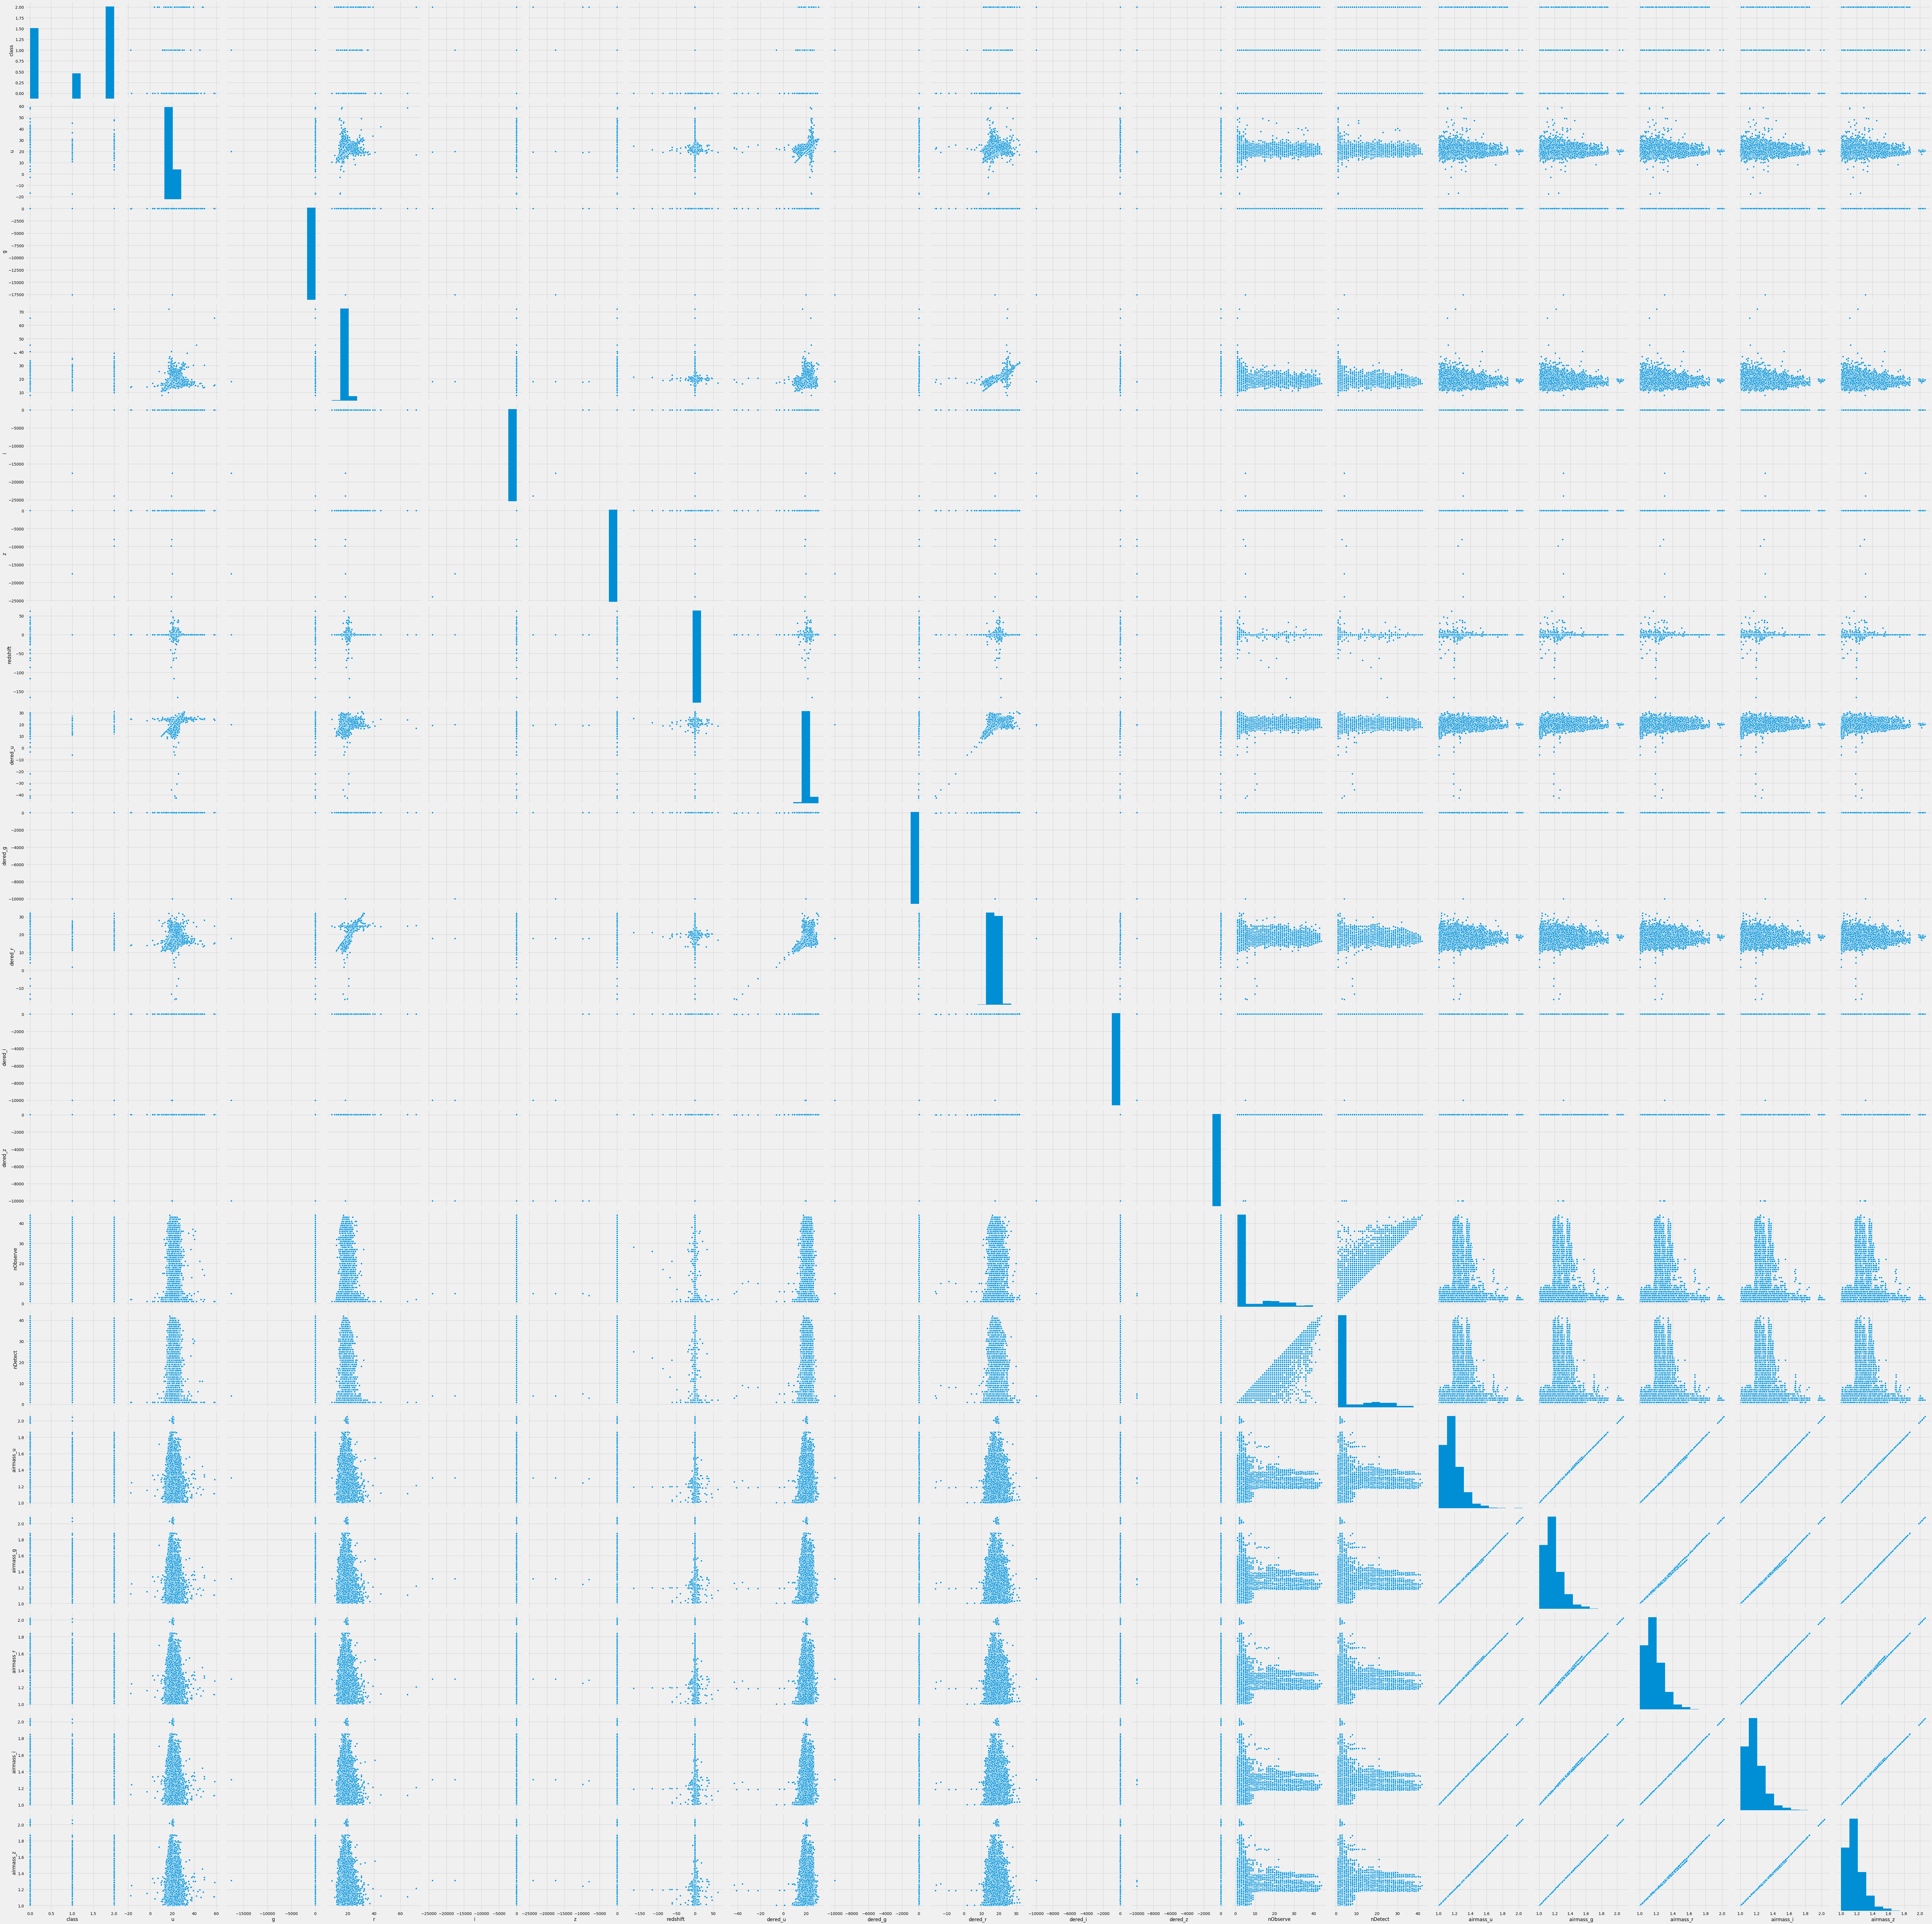

In [10]:
sns.pairplot(data=trn, vars=['class','u','g','r','i','z',
                             'redshift','dered_u','dered_g','dered_r','dered_i','dered_z',
                             'nObserve','nDetect',
                             'airmass_u','airmass_g','airmass_r','airmass_i','airmass_z'],size=5)

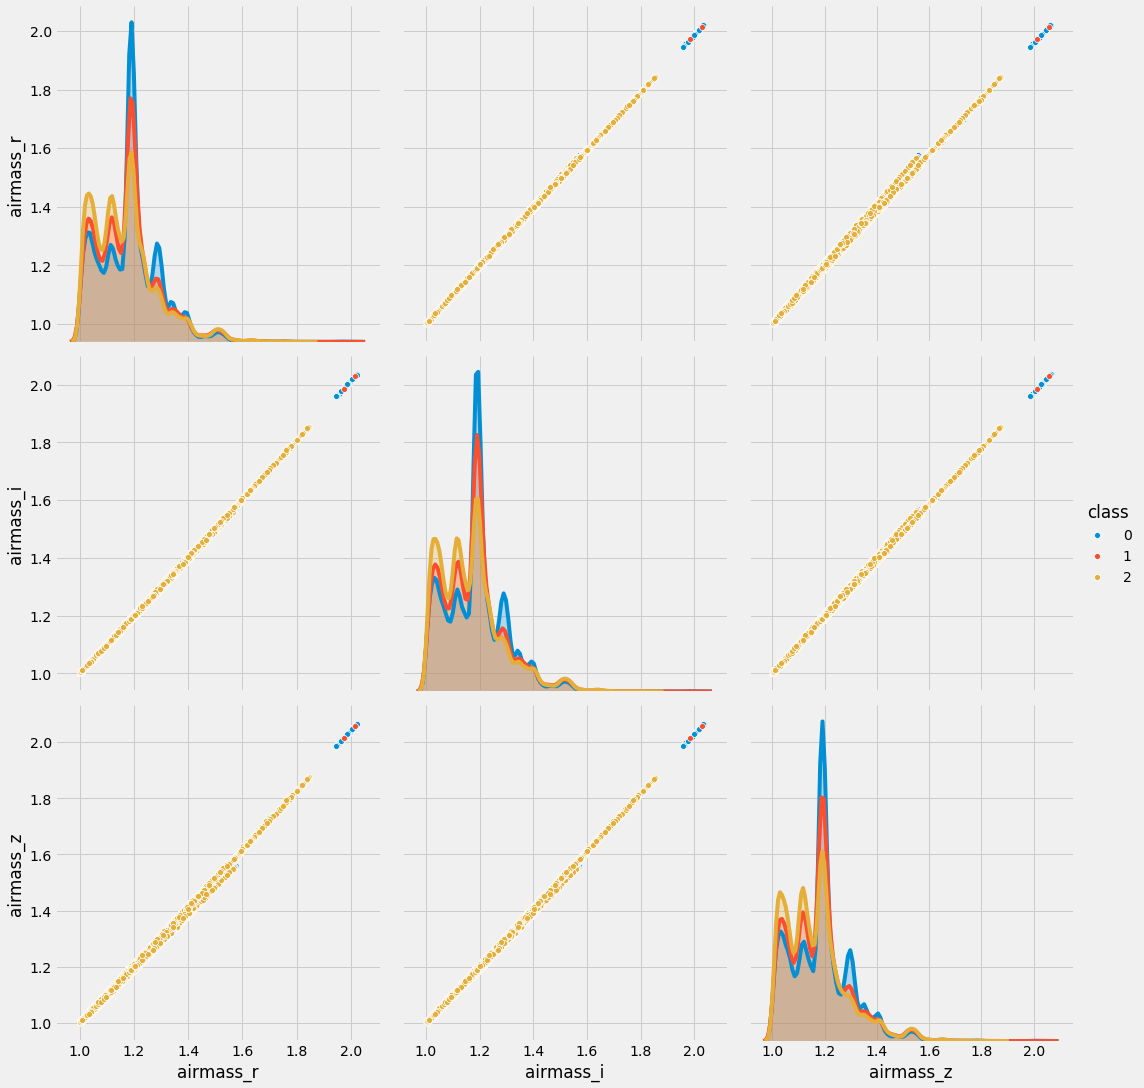

In [11]:

sns.pairplot(data=trn, vars=['airmass_r','airmass_i','airmass_z'],hue = 'class', size=5)


In [29]:
num_cols = [x for x in trn.columns if trn[x].dtype in [np.int64, np.float64]]
print(num_cols)

['u', 'g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z', 'nObserve', 'nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z', 'class']


In [30]:
rmse = lambda y, p: np.sqrt(mean_squared_error(y,p))
rmlse = lambda y, p: np.sqrt(mean_squared_error(np.log1p(y),np.log1p(p)))

# RMSE 값이 0 이 떴다. 내가 만든 모델이 굉장히 선형 적인 모델 임을 말하고 있는 것이다. 

In [55]:
lr = LinearRegression()
target_col = 'airmass_u'
pred_col='pred'
lr.fit(trn[num_cols],trn[target_col])
trn[pred_col] = lr.predict(trn[num_cols])
print(f' RMSE: \t {rmse(trn[target_col], trn[pred_col]) : 12.2f}')

 RMSE: 	         0.00


# 그래서 이 그래프들도 선형적으로 이쁘게 나오는 것.

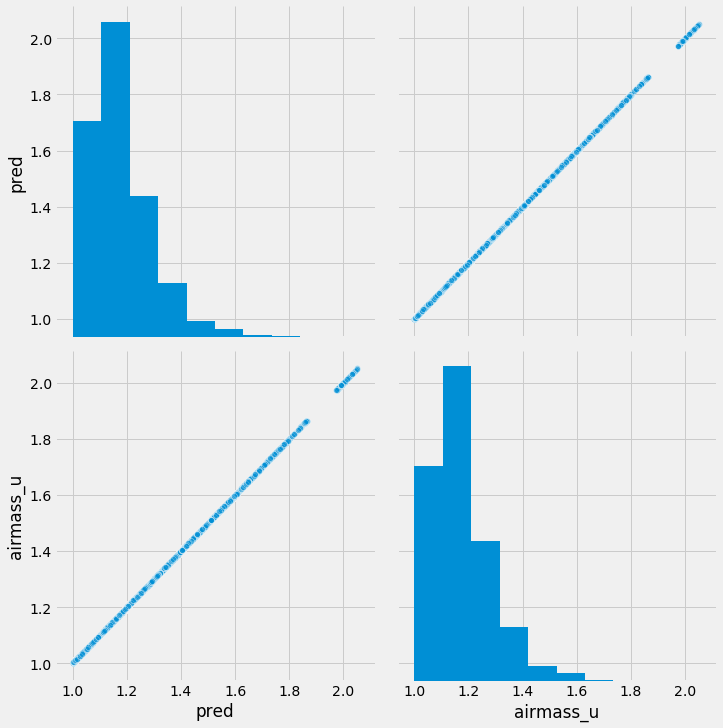

In [56]:
sns.pairplot(data=trn, vars = [pred_col, target_col], size = 5, plot_kws={'alpha' : .5})

# airmass_u 이라는 칼럼에다가 에다가 log1p 를 하여 그래프로 표현 한 것이다. 
# 그래도 야아아악간은 정규 분포에 가깝게 값이 나오게 된 것 같다. 

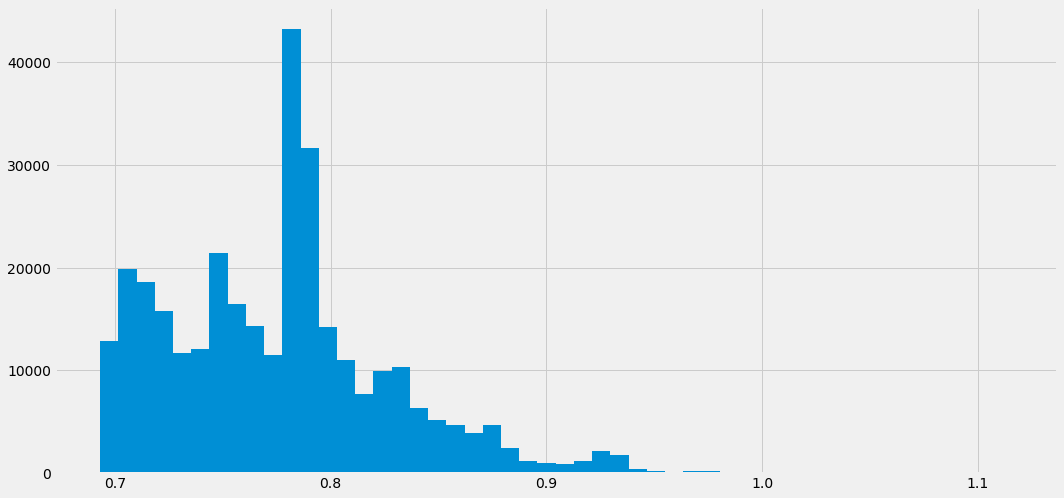

In [57]:
trn.airmass_u.apply(np.log1p).hist(bins=50)

# expm1 은 log1p 를 원상태로 복귀 시키는 것임. 

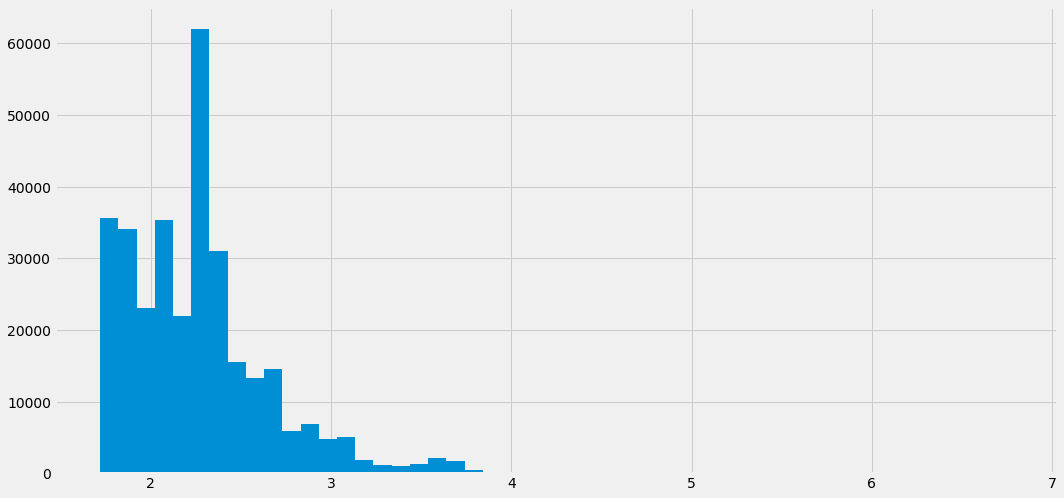

In [58]:
trn.airmass_u.apply(np.expm1).hist(bins=50)

In [59]:
lr = LinearRegression()
lr.fit(trn[num_cols],np.log1p(trn[target_col]))
trn[pred_col]= np.expm1(lr.predict(trn[num_cols]))

print(f' RMSE : \t {rmse(trn[target_col], trn[pred_col]) :12.2f}')
print(f' RMLSE : \t {rmse(trn[target_col], trn[pred_col]) :12.2f}')

 RMSE : 	         0.00
 RMLSE : 	         0.00


# 위에서 그래프에서 본것과 같이 굉장히 prediction 값이 이쁘게 선형적으로 잘 나온 것을 볼 수 잇따. 그렇기 때문에 RMSE, RMLSE (에러 함수 값) 이 0 이 나오는 것 같음. 

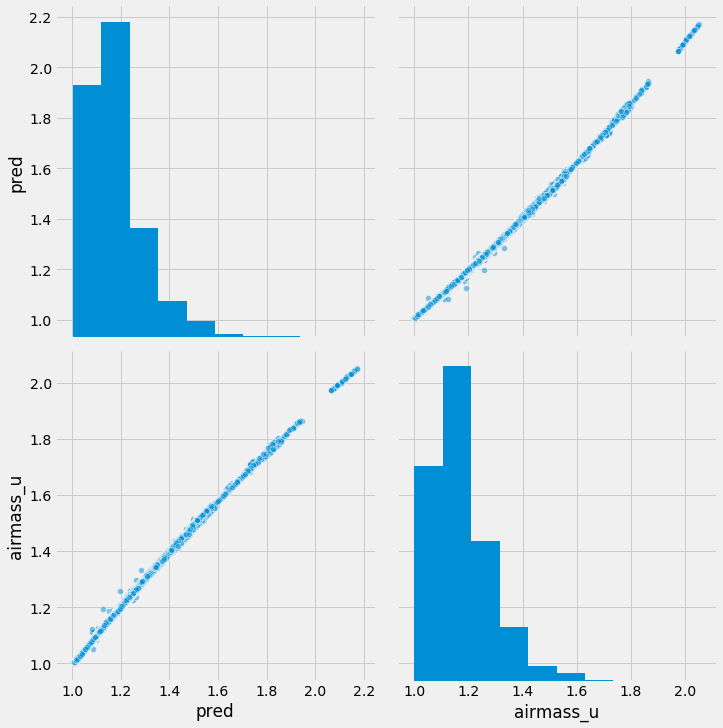

In [63]:
sns.pairplot(data=trn, vars=[pred_col, target_col], size = 5, plot_kws={'alpha' : .5})


# 아무리 생각해도 다른 방식으로 수치형 변수를 표현하는 것이 맞는 것 같다. 아무것도 하지 않은 상태에서 RMSE 를 구했을 때도 0 이 뜨는데.... log1p 를해서 RMSE 가 그대로 나왔는걸... 뭘 더 이상 알아보는게 의미가 있는 것일까
# 어디선가 대단히 잘못 된 것같다. 그러나 원인을 도저히 모르겠다..... 정답을 알고 싶다...... 